<a href="https://colab.research.google.com/github/Jlok17/2022MSDS/blob/main/Data_622_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data 622 Homework 2

### Decision Trees Algorithms

#### Pre-work
1. Read this blog: https://decizone.com/blog/the-good-the-bad-the-ugly-of-using-decision-trees which shows some of the issues with decision trees
2. Choose a dataset from a source in Assignment #1, or another dataset of your choice.

#### Assignment Work

1. Based on the latest topics presented, choose a dataset of your choice and create a Decision Tree where you can solve a classification problem and predict the outcome of a particular feature or detail of the data used.
2. Switch variables* to generate 2 decision trees and compare the results. Create a random forest and analyze the results.
3. Based on real cases where desicion trees went wrong, and 'the bad & ugly' aspects of decision trees (https://decizone.com/blog/the-good-the-bad-the-ugly-of-using-decision-trees), how can you change this perception when using the decision tree you created to solve a real problem?


#### Deliverable
1. Essay (minimum 500 word document) Write a short essay explaining your analysis, and how you would address the concerns in the blog (listed in pre-work)
2. Exploratory Analysis using R or Python (submit code + errors + analysis as notebook or copy/paste to document)


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

### Data Source

For this dataset, we are taking the one of the data sources about wine quality. It is related to the Portuguese "Vinho Verde" wine with 2 data sources, one for red and the other for white. These wines are from the north of Portugal and using this data I will be attempting to model wine quality based on their input variables that was measured by physicochemical tests. The data itself is hosted on the UC Irvine Machine Learning Repository and comprises of 4898 entries across 12 different variables, 11 inputs and 1 output. Utilizing this data set, I will be exploring the use of decision trees and random forest to see "the bad and ugly" aspects of decision trees.


The 12 columns being:
Input Variables based on Physicochemical Test
* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Alcohol

Output Variables
* Quality (score between 0 and 10)




[Data Source](https://archive.ics.uci.edu/dataset/186/wine+quality)

In [194]:
df = pd.read_csv("https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/winequality-white.csv", sep =";")

#### Data Manipulation

For the Data Manipulation, we first see that there isn't any Null values within the data set so we don't have to do any imputation or removal of data. The next step is to check the data type of each column which we can see are either float or int which is good since it means that everything is numeric and doesn't need to be converted to a metric. A common step that I would typically do is to check the unique values of each column which proves to be a bit redundant since everything is numeric there is a chance than any of the columns could have 4898 unique values. As explained above there are 10 input variables and 1 output variables so the next step is to find the distribution of data for each column. This can be achieved by converting the dataframe into long format and then plot each column in counts for unique values as a histogram. Overall when looking at the input variables we can see a good distribution of data. While on the contary, the output variable has a very skewed data set towards the quality values of 5,6,7. Due to the lack of equal distribution between all unique values of quality, I had decided to group quality values into 3 group that are similarily distributed. 3,4,5 will be classified as 0, 6 will be classified as 1, and 7,8,9 will be classified as 2.

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [196]:
# Column Names and Unique Values
for i in df.columns:
  print(i)
  print(df[i].unique())
  print("")

fixed acidity
[ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15  4.5
  7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9 ]

volatile acidity
[0.27  0.3   0.28  0.23  0.32  0.22  0.18  0.16  0.42  0.17  0.48  0.66
 0.34  0.31  0.26  0.67  0.25  0.24  0.14  0.12  0.39  0.33  0.45  0.46
 0.19  0.2   0.21  0.38  0.47  0.35  0.54  0.43  0.44  0.265 0.36  0.305
 0.13  0.41  0.485 0.425 0.37  0.255 0.595 0.29  0.53  0.15  0.57  0.4
 0.245 0.685 0.495 0.64  0.52  0.115 0.58  0.585 0.59  0.6   0.55  0.125
 0.1   0.145 0.335 0.365 0.905 0.49  0.155 0.51  0.62  0.345 0.475 0.56
 0.235 0.105 0.5   0.11  0.225 0.395 0.655 0.205 0.415 0.705 0.08  0.68
 0.275 0.61  0.135 0.165 0.85  0.185 0.325 0.445 0.54

In [197]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


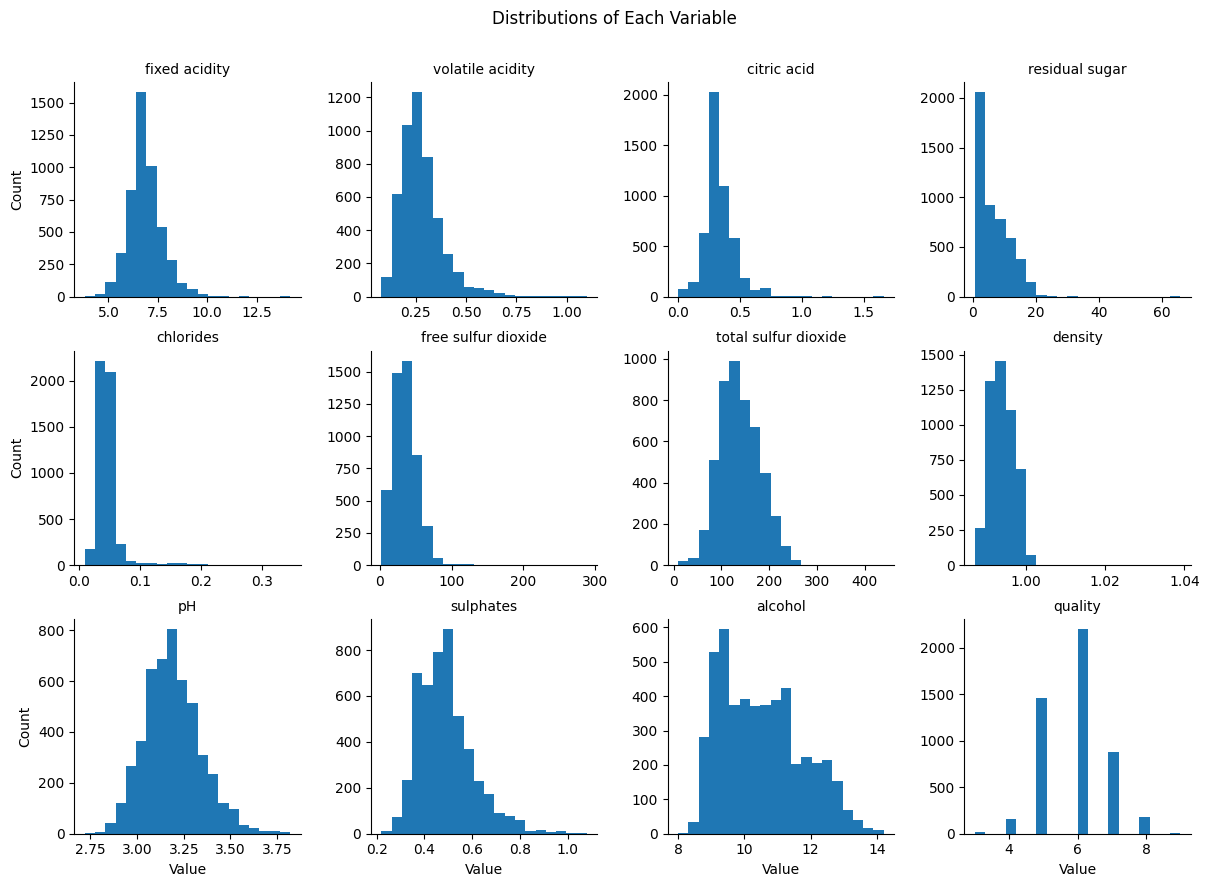

In [198]:
# Converting df into a Long Format
data_long = pd.melt(df, var_name='name', value_name='value')

# FacetGrid
q = sns.FacetGrid(data_long, col="name", col_wrap=4, sharex=False, sharey=False)

# Creating Histograms
q.map(plt.hist, 'value', bins=20)
q.set_axis_labels('Value', 'Count')
q.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
q.fig.suptitle('Distributions of Each Variable')

plt.show()

In [199]:
# Converting Quality into 3 Ranges
df['quality_group'] = df['quality'].apply(lambda x: 0 if x in [3, 4, 5] else (1 if x == 6 else 2))

In [200]:
# Creating Features and Target
# Getting rid of Quality since Quality Group is based on it
X = df.drop(['quality', 'quality_group'], axis=1)
y = df['quality_group']

In [201]:
# Correlation Matrix
correlation_matrix = df.corr(method='spearman')
print(correlation_matrix['quality_group'].sort_values(ascending=False))

quality_group           1.000000
quality                 0.991145
alcohol                 0.449001
pH                      0.110730
sulphates               0.034406
citric acid             0.013931
free sulfur dioxide     0.006191
fixed acidity          -0.082075
residual sugar         -0.094742
volatile acidity       -0.192423
total sulfur dioxide   -0.209429
chlorides              -0.318858
density                -0.356774
Name: quality_group, dtype: float64


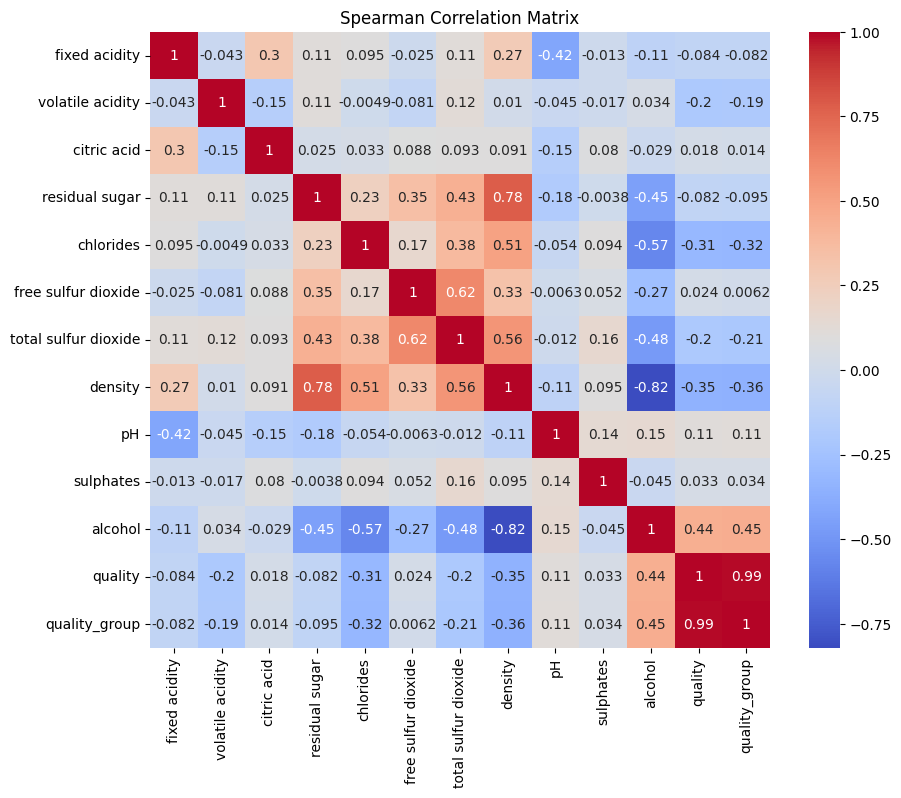

In [202]:
# Correlation Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

### Prediction Model

For the Decision Tree's, I decided to alternate the more correlated predictors between the 2 different decision tree to make it as fair as possible for having hopefully an equal weight of predictors. I also decided to only do 4 each since there are 11 input predictors and the bottom 3 have a correlation with Quality Group, my output, of less than 0.05 so I felt that they wouldn't contribute too much to the different decision tree models. Lastly after I ran a random forest to further showcase the different in predicting modeling as well as what happens when all predictors are used and the model's performance.

#### Decision Tree 1

For the first decision tree, I decided to use Density, Chlorides, pH, and Residual Sugar as my features. As to just showcase briefly the model's preformance we can see a overall accuracy rate of roughly 50%.

In [203]:
# Features for Decision Tree 1
features_dt1 = ['density', 'chlorides', 'pH', 'residual sugar']
X_dt1 = X[features_dt1]

# Splitting the dataset
X_train_dt1, X_test_dt1, y_train, y_test = train_test_split(X_dt1, y, test_size=0.2, random_state=17)

# Building the model
dtree1 = DecisionTreeClassifier(random_state=17, max_depth=5)
dtree1.fit(X_train_dt1, y_train)

# Evaluating the model
predictions_dt1 = dtree1.predict(X_test_dt1)
print(classification_report(y_test, predictions_dt1))
print(confusion_matrix(y_test, predictions_dt1))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51       334
           1       0.47      0.57      0.52       415
           2       0.57      0.34      0.43       231

    accuracy                           0.50       980
   macro avg       0.52      0.48      0.49       980
weighted avg       0.51      0.50      0.49       980

[[174 153   7]
 [127 236  52]
 [ 43 109  79]]


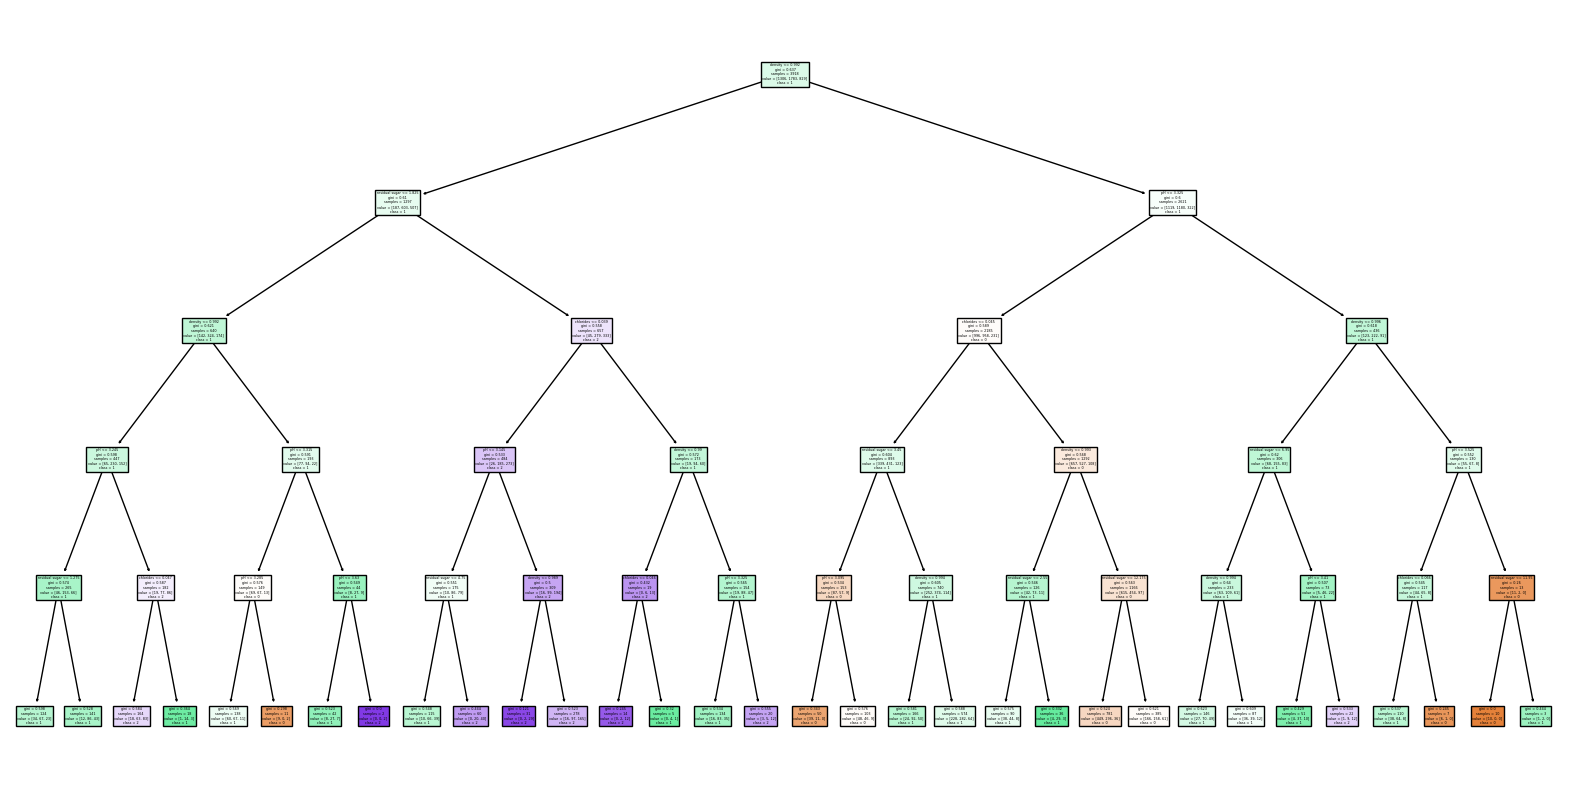

In [204]:
# Decision Tree Visual
plt.figure(figsize=(20,10))
tree.plot_tree(dtree1, filled=True, feature_names=X_dt1.columns, class_names=['0', '1', '2'])
plt.show()

In [205]:
# Decision Tree Text
tree_rules = export_text(dtree1, feature_names=list(X_dt1.columns))
print(tree_rules)

|--- density <= 0.99
|   |--- residual sugar <= 1.82
|   |   |--- density <= 0.99
|   |   |   |--- pH <= 3.25
|   |   |   |   |--- residual sugar <= 1.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- residual sugar >  1.27
|   |   |   |   |   |--- class: 1
|   |   |   |--- pH >  3.25
|   |   |   |   |--- chlorides <= 0.05
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- chlorides >  0.05
|   |   |   |   |   |--- class: 1
|   |   |--- density >  0.99
|   |   |   |--- pH <= 3.31
|   |   |   |   |--- pH <= 3.28
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pH >  3.28
|   |   |   |   |   |--- class: 0
|   |   |   |--- pH >  3.31
|   |   |   |   |--- pH <= 3.63
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pH >  3.63
|   |   |   |   |   |--- class: 2
|   |--- residual sugar >  1.82
|   |   |--- chlorides <= 0.04
|   |   |   |--- pH <= 3.15
|   |   |   |   |--- residual sugar <= 4.75
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- residual sugar >  4.7

#### Decision Tree 2

For the second decision tree, I decided to use Alcohol, Total Sulfur Dioxide, Volatile Acidity, and Fixed Acidity as my features. As to just showcase briefly the model's preformance we can see a overall accuracy rate of roughly 56%. This model did perform better than the first decision tree, even though the first decision tree used my favorite number as the random_state.

In [206]:
# Features for Decision Tree 2
features_dt2 = ['alcohol', 'total sulfur dioxide','volatile acidity', 'fixed acidity']
X_dt2 = X[features_dt2]

# Splitting the dataset
X_train_dt2, X_test_dt2, y_train, y_test = train_test_split(X_dt2, y, test_size=0.2, random_state=21)

# Building the model
dtree2 = DecisionTreeClassifier(random_state=21, max_depth = 5)
dtree2.fit(X_train_dt2, y_train)

# Evaluating the model
predictions_dt2 = dtree2.predict(X_test_dt2)
print(classification_report(y_test, predictions_dt2))
print(confusion_matrix(y_test, predictions_dt2))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       318
           1       0.54      0.60      0.57       447
           2       0.54      0.38      0.44       215

    accuracy                           0.56       980
   macro avg       0.56      0.53      0.54       980
weighted avg       0.56      0.56      0.55       980

[[196 114   8]
 [116 269  62]
 [ 16 118  81]]


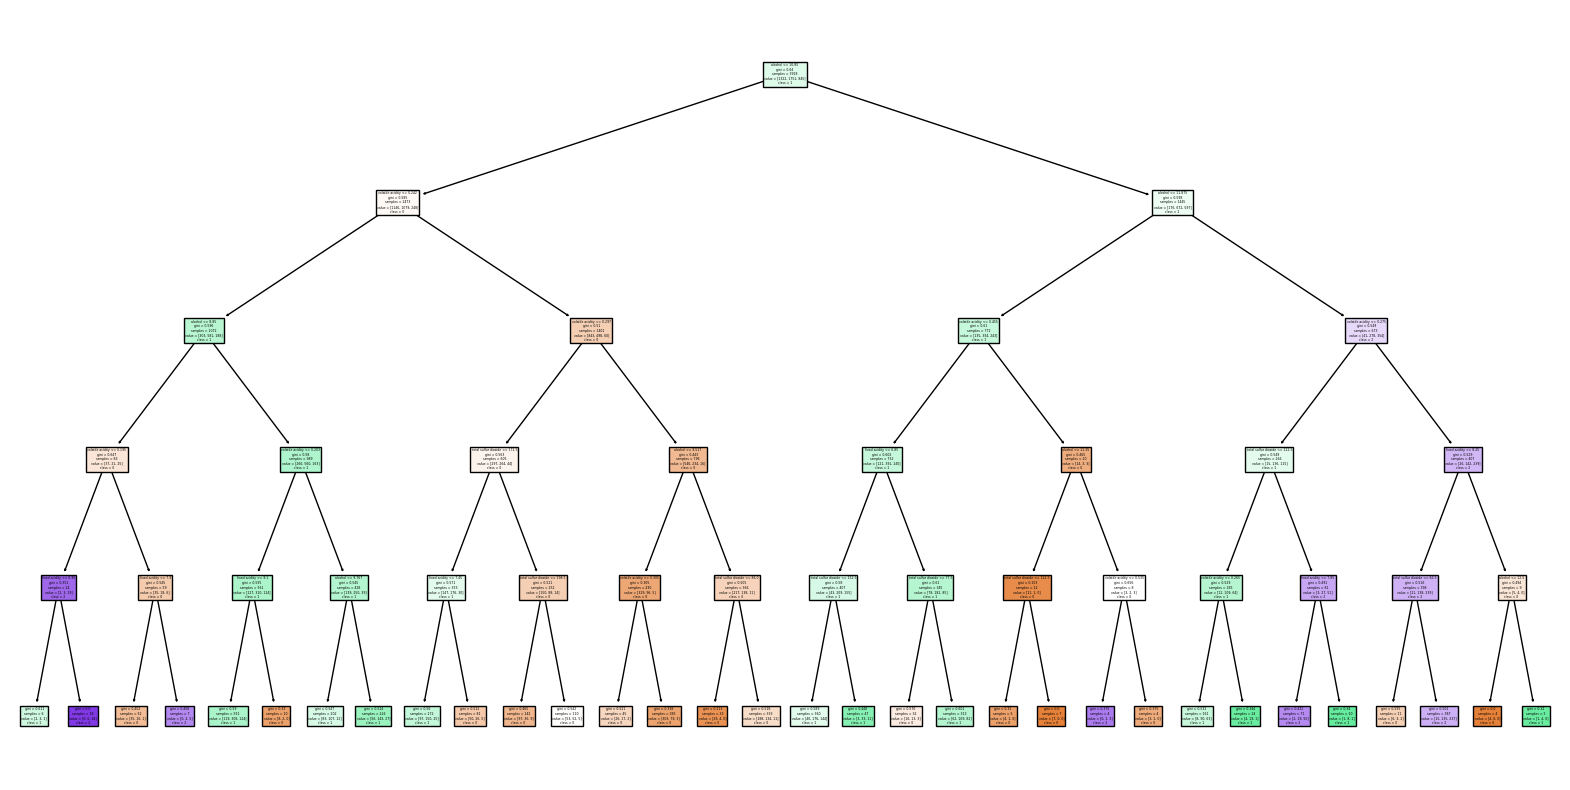

In [207]:
# Decision Tree Visual
plt.figure(figsize=(20,10))
tree.plot_tree(dtree2, filled=True, feature_names=X_dt2.columns, class_names=['0', '1', '2'])
plt.show()

In [208]:
# Decision Tree Text
tree_rules2 = export_text(dtree2, feature_names=list(X_dt2.columns))
print(tree_rules2)

|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.24
|   |   |--- alcohol <= 8.85
|   |   |   |--- volatile acidity <= 0.20
|   |   |   |   |--- fixed acidity <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fixed acidity >  6.95
|   |   |   |   |   |--- class: 2
|   |   |   |--- volatile acidity >  0.20
|   |   |   |   |--- fixed acidity <= 7.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fixed acidity >  7.90
|   |   |   |   |   |--- class: 2
|   |   |--- alcohol >  8.85
|   |   |   |--- volatile acidity <= 0.20
|   |   |   |   |--- fixed acidity <= 9.10
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fixed acidity >  9.10
|   |   |   |   |   |--- class: 0
|   |   |   |--- volatile acidity >  0.20
|   |   |   |   |--- alcohol <= 9.77
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- alcohol >  9.77
|   |   |   |   |   |--- class: 1
|   |--- volatile acidity >  0.24
|   |   |--- volatile acidity <= 0.30
|   |   |   |--- total sulfur dioxide <= 1

#### Random Forest

In [209]:
# Separating Train/Test set for Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=334)

# Random Forest Model
rf = RandomForestClassifier(random_state=334)
rf.fit(X_train, y_train)

# Evaluating the model
predictions_rf = rf.predict(X_test)
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       310
           1       0.70      0.80      0.75       449
           2       0.83      0.62      0.71       221

    accuracy                           0.75       980
   macro avg       0.77      0.73      0.74       980
weighted avg       0.76      0.75      0.75       980



### Essay

For the decision tree comparison we can see that the first one has a balanced performance with precisiong and recall when identifying the classes 0 and 1 but has trouble with class 2. With an accuracy rate of only 50%, it is technically better than guessing which would be a theoretical 33% accuract rate but shows that there needs to be better predictors and model parameter tuning for better performance. For the 2nd decision tree we have an accuracy rate of 56% rate which out performes the first model in an overall sense. We can see that similar to the 1st decision tree it is able to have a balance performance for class 1 and class 0 but struggles heavily with class 2. Interestingly enough the precision rate for each class is very similar values for both models but we can see it struggle with recall percentage. A couple of observation that can help showcase this is that recall rate for class 0 and 1 for decision tree 1 are 0.52 and 0.57 respectively and for decision tree 2 is 0.62 and 0.60. But for class 2 it is 0.34 for model 1 and 0.38 for model 2. I am not sure if it was part of the reason why but balancing the input predictors for each model did seem to make the decision tree models to perform similarly. Now when the data is then ran through a Random Forest Model, we see a greatly improve model with an overall accuracy rate of 75%. Class 2 prediction is still the lowest but ironically enough it has a higher precision rate than class 1 and class 0 with a recall rate of 0.62 which is higher than either of the decision trees. This can be because of many different reason, I do belive that utilizing all of the input predictors is the biggest contributing factor since it allows every factor to be utilize when predicting the quality group. Random forest also typically outperforms decision trees since it is an ensemble of decision trees which helps reduce the risk of overfitting as well as balancing bias and variance by building multiple deep trees compared to decision trees mainly utilizing depth. There are other reason such as Random Forest being able to less influenced by noise when leveraging the relationships with it's own multiple decision trees as well as generally being better with unbalanced data.

----
For the article, we can see the downfall for decision trees as they face heavy challenges with complexity and not being as adaptable with subjective decision criteria. Since the conventional decision tree approach is typically struggling with lack of usability and needing a lot of effort in order to continuously create and maintain, having a no-code solution seems basically impossible. Something that can be done for these concerns that is actively going on is creating different tools that don't require code for development. With the advancements in technology and coding languages, we can see the development of coding languages in general that are more human-like in commands, such as SQL and OCaml, as well as computing power. With programming languages like these, there is an easier way for developers and non-code analysis to create a robust system for decision tree maintenance and stagnant issues.